In [31]:
 from google.colab import drive
 drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
titanic_csv= "/content/gdrive/MyDrive/DataSets/titanic.csv"
# house_csv= "/content/gdrive/MyDrive/DataSets/house-price.csv"
# mercedes_csv = "/content/gdrive/MyDrive/DataSets/mercedes.csv"


In [34]:
df=pd.read_csv(titanic_csv)
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [35]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [36]:
df.cabin.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: cabin, dtype: object

In [37]:
import numpy as np
cabin_null = np.where(df.cabin.isnull(),1,0)

In [38]:
df['cabin_null']=cabin_null

In [39]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,cabin_null
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,1


In [40]:
df.cabin_null.mean()*100

77.52941176470588

In [41]:
df.groupby(['survived'])["cabin_null"].mean()

survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

In [44]:
df = pd.read_csv(titanic_csv,usecols=['age','fare','survived'])
df.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [45]:
df.isnull().mean()

age         0.204706
fare        0.001176
survived    0.000000
dtype: float64

In [56]:
def input_nan(df,variable,median):
  df[variable+"_median"]= df[variable].fillna(median)


In [57]:
input_nan(df,'age',df.age.median())



In [58]:
df["Age_mean"]= df["age"].fillna(df.age.mean())

In [59]:
df.head()

,age,fare,survived,Age_mean,age_median
0,NaN,7.7333,1,29.519847,28.0
1,38.0,8.6625,0,38.000000,38.0
2,30.0,24.1500,0,30.000000,30.0
3,54.0,23.0000,1,54.000000,54.0
4,40.0,13.0000,0,40.000000,40.0


In [50]:
print(df["age"].std())

14.562243434125556


In [60]:
df.age.std(),df.age_median.std()

(14.562243434125556, 12.999022882894202)

In [61]:
df.age.std(), df.Age_mean.std()

(14.562243434125556, 12.984532809132206)

In [62]:
df.age.mean() ,df.age.median()

(29.519847189349115, 28.0)

In [63]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [64]:
df.age.value_counts()

18.0000    32
30.0000    30
24.0000    29
22.0000    28
25.0000    26
           ..
80.0000     1
0.4167      1
22.5000     1
40.5000     1
76.0000     1
Name: age, Length: 88, dtype: int64

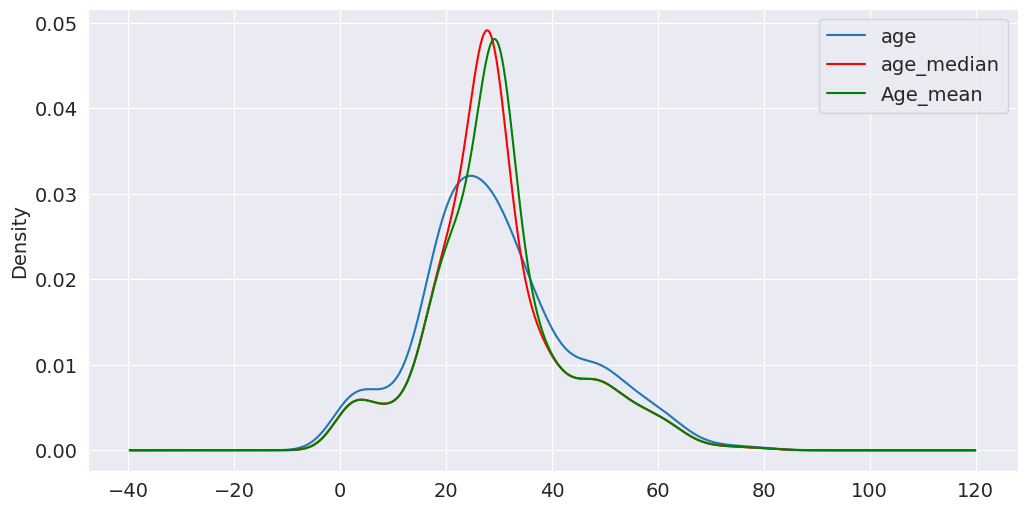

In [67]:
fig = plt.figure()
axes = fig.add_subplot(111)

df.age.plot(kind="kde") #kernel density estimate
df.age_median.plot(kind="kde",color="red",ax=axes)
df.Age_mean.plot(kind="kde",color="green",ax=axes)

lines, label = axes.get_legend_handles_labels()
axes.legend(lines,label,loc="best")

In [69]:
df.columns

Index(['age', 'fare', 'survived', 'Age_mean', 'age_median'], dtype='object')

In [73]:
df_random = df[["age",'fare','survived']].copy()

In [74]:
df_random.head()

,age,fare,survived
0,NaN,7.7333,1
1,38.0,8.6625,0
2,30.0,24.1500,0
3,54.0,23.0000,1
4,40.0,13.0000,0


In [77]:
df_random.isnull().sum()

age         174
fare          1
survived      0
dtype: int64

In [78]:
df_random.age.isnull().sum()

174

In [79]:
df_random.age.dropna().sample(2)

835    23.0
715    22.0
Name: age, dtype: float64

In [80]:
df_random.age.dropna().sample(df.age.isnull().sum(),random_state=0).count()

174

In [81]:
df_random[df_random.age.isnull()]

,age,fare,survived
0,NaN,7.7333,1
17,NaN,23.2500,1
21,NaN,8.4583,0
28,NaN,7.2292,0
30,NaN,25.9250,0
...,...,...,...
814,NaN,7.6292,0
820,NaN,7.7292,0
821,NaN,22.3583,1
828,NaN,8.0500,0


In [83]:
df.loc[836] #fetch row

age                 NaN
fare          31.683300
survived       1.000000
Age_mean      29.519847
age_median    28.000000
Name: 836, dtype: float64

In [84]:
df[df.age.isnull()]["age"]

0     NaN
17    NaN
21    NaN
28    NaN
30    NaN
       ..
814   NaN
820   NaN
821   NaN
828   NaN
836   NaN
Name: age, Length: 174, dtype: float64

In [85]:
def impute_nan(df,feature,median):
    df[feature+"_median"] = df[feature].fillna(median)
    df[feature+"_random"] = df[feature]
    # random sample to fill NaN
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)

    # pandas needs to have same index in order to merge the datasets

    random_sample.index = df[df[feature].isnull()].index

    df.loc[df[feature+"_random"].isnull(),feature+"_random"] = random_sample

In [86]:
median = df_random.age.median()
median

28.0